# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home diretcory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
dog_files = np.array(glob(r"dogImages/*/*/*"))
human_files = np.array(glob(r"lfw/*/*"))

# print number of images in each dataset
print(f'There are {len(dog_files)} total dog images.')
print(f'There are {len(human_files)} total human images.')
human_files[0]

There are 8351 total dog images.
There are 13233 total human images.


'lfw\\Aaron_Eckhart\\Aaron_Eckhart_0001.jpg'

In [2]:
array3 = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
array3.shape

(4, 3)

In [3]:
data2 = np.array([1,2,3,3.5,4])
data2

array([1. , 2. , 3. , 3.5, 4. ])

In [4]:
import tensorflow as tf

In [26]:
from deepface import DeepFace
result  = DeepFace.verify('Picture2.jpg', 'Aaron_Eckhart_0001.jpg', model_name = "DeepFace")
print("Is verified: ", result["verified"])

VGGFace2_DeepFace_weights_val-0.9034.h5 will be downloaded...


Downloading...
From: https://github.com/swghosh/DeepFace/releases/download/weights-vggface2-2d-aligned/VGGFace2_DeepFace_weights_val-0.9034.h5.zip
To: C:\Users\young\.deepface\weights\VGGFace2_DeepFace_weights_val-0.9034.h5.zip
100%|███████████████████████████████████████████████████████████████████████████████| 511M/511M [00:45<00:00, 11.3MB/s]


Is verified:  False


In [ ]:
models = ["VGG-Face", "Facenet", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib"]
for model in models:
   result = DeepFace.verify("Aaron_Eckhart_0001.jpg", "Aaron_Guiel_0001.jpg", model_name = model)
   df = DeepFace.find(img_path = "Aaron_Eckhart_0001.jpg", db_path = "C:/Users/young/OneDrive/deep learning/project2", model_name = model)

<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Matplotlib is building the font cache; this may take a moment.


Number of faces detected: 1


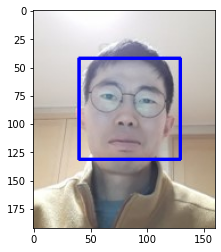

In [6]:
import cv2                
import matplotlib.pyplot as plt
#import face_recognition
%matplotlib inline                               

# extract pre-trained face detector
new_path = 'C:/Users/young/anaconda3/Library/etc/haarcascades/'
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')

# load color (BGR) image
#img = face_recognition.load_image_file(human_files[0])
img = cv2.imread('Picture2.jpg')
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
#faces = face_recognition.load_image_file(human_files[0])
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()


Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [4]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
Percentage of human faces detected in human files: 96.0%
Percentage of human faces detected in dog files: 18.0%

In [5]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_faces = [face_detector(img_path) for img_path in human_files_short]
dog_faces = [face_detector(img_path) for img_path in dog_files_short]

# Calculate percentages
human_percentage = (human_faces.count(True) / len(human_files_short)) * 100
dog_percentage = (dog_faces.count(True) / len(dog_files_short)) * 100

print("Percentage of human faces detected in human files: %1.1f%%" % human_percentage)
print("Percentage of human faces detected in dog files: %1.1f%%" % dog_percentage)


Percentage of human faces detected in human files: 96.0%
Percentage of human faces detected in dog files: 18.0%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.
human_count = 0
for img in human_files_short:
    isPerson = face_detector(img)
    if isPerson:
        human_count += 1
percentage = (human_count/len(human_files_short)) * 100
print('Percentage of humans correctly classified as people: {}%'.format(percentage))

dog_count = 0
for img in dog_files_short:
    isPerson = face_detector(img)
    if isPerson:
        dog_count += 1
percentage = (dog_count/len(dog_files_short)) * 100
print('Percentage of dogs misclassified as people: {}%'.format(percentage))


Percentage of humans correctly classified as people: 96.0%
Percentage of dogs misclassified as people: 18.0%


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    print("Cuda is available.")
    VGG16 = VGG16.cuda()
else:
    print("Cuda is not available.")

Cuda is not available.


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [7]:
from PIL import Image
import torchvision.transforms as transforms
from torch.autograd import Variable
import cv2
import requests
import io
import torch.nn as nn

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    img = Image.open(img_path)
     
    preprocess = transforms.Compose([
            transforms.ToTensor()  
        ])
    img = preprocess(img)
    img = img.unsqueeze(0)
    img = Variable(img)
    up = nn.Upsample(size=224, mode='bilinear', align_corners=True)
    img = up(img)
    
    prediction = VGG16(img)
    prediction = prediction.data.numpy().argmax()
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_pathReturn the *index* of the predicted class for that image
    ## 
    
    return prediction # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [8]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    index = VGG16_predict(img_path)
    return (151 <= index <= 268) # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
What percentage of the images in human_files_short hae a detectevd dog: 0.0%
What percentage of the images in dog_files_short have a detected dog: 92.0%


In [8]:

### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
n = 0
for i in human_files_short:
    if dog_detector(i):
        n += 1
print("What percentage of the images in human_files_short have a detected dog: {}%".format(n/len(human_files_short)*100))

n = 0
for i in dog_files_short:
    if dog_detector(i):
        n += 1
print("What percentage of the images in dog_files_short have a detected dog: {}%".format(n/len(dog_files_short)*100))


What percentage of the images in human_files_short have a detected dog: 0.0%
What percentage of the images in dog_files_short have a detected dog: 89.0%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [17]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.
from keras.applications.resnet50 import ResNet50

# define ResNet50 model
ResNet50_model = ResNet50(weights='imagenet')


102973440/102967424 [==============================] - 9s 0us/step


In [18]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)


In [19]:
from keras.applications.resnet50 import preprocess_input, decode_predictions

def ResNet50_predict_labels(img_path):
    # returns prediction vector for image located at img_path
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(ResNet50_model.predict(img))

In [20]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    prediction = ResNet50_predict_labels(img_path)
    return ((prediction <= 268) & (prediction >= 151)) 


In [21]:
# Test the performance of the dog_detector function
# on the images in human_files_short and dog_files_short.

dogs_in_human_files = [dog_detector(img_path) for img_path in human_files_short]
dogs_in_dog_files = [dog_detector(img_path) for img_path in dog_files_short]

# Caculate percentages
human_percentage = (dogs_in_human_files.count(True) / len(human_files_short)) * 100
dog_percentage = (dogs_in_dog_files.count(True) / len(dog_files_short)) * 100

print("Percentage of dog faces detected in human files: %1.1f%%" % human_percentage)
print("Percentage of dog faces detected in dog files: %1.1f%%" % dog_percentage)

Percentage of dog faces detected in human files: 0.0%
Percentage of dog faces detected in dog files: 95.0%


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [9]:
import os
import torch
from torch.autograd import Variable
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

torch.manual_seed(777)  # reproducibility

# parameters
learning_rate = 0.001
#batch_size = 1
#num_workers = 0
keep_prob = 0.7
data_dir="dogImages/"
TRAIN = 'train'
VAL = 'valid'
TEST = 'test'


# TODO: Define your transforms for the training, validation, and testing sets
data_transforms = {TRAIN: transforms.Compose([
        transforms.RandomResizedCrop(224),    
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
                  VAL: transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
                  TEST: transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])}

image_datasets = {x: dsets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in [TRAIN, VAL, TEST]}


dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=10,
                                             shuffle=True, num_workers=0)
              for x in [TRAIN, VAL, TEST]}

dataset_sizes = {x: len(image_datasets[x]) for x in [TRAIN, VAL, TEST]}
class_names = image_datasets[TRAIN].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print("number of training images:", len(image_datasets[TRAIN]))
print("numbe of validation images:", len(image_datasets[VAL]))
print("number of testing images:", len(image_datasets[TEST]))

number of training images: 6680
numbe of validation images: 835
number of testing images: 836


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
Question 1. 
trainloader, validloader, and testloader: I tried to preprocess train, valid, and test datasets like rotating, cropping, and flipping the images. I also tried to match to the correct image sizes to transmit to CNN architecture.
Question 2.
Yes, I decided to augment the original datasets. I used rotation, flip, crop, and normalization methods to the datasets.   

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [10]:
import torch.nn as nn
import torch.nn.functional as F
total_dog_classes = 133
# define the CNN architecture
class Net(nn.Module):
    # choose an architecture and complete the class
    def __init__(self):
        super(Net, self).__init__()
        # 1st convolutional layer
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        # 2nd convolutional layer
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        # 3rd convolutional layer
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        # 4th convolutional layer
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1)
        # 5th convolutional layer
        self.conv5 = nn.Conv2d(128, 256, 3, padding=1)
        # max pooling layer
        self.pool = nn.MaxPool2d(2,2)
        # 1st fully connected hidden linear layer
        self.fc1 = nn.Linear(256 * 7 * 7, 1920)
        # 2nd fully connected hidden linear layer
        self.fc2 = nn.Linear(1920, 1000)
        # final output layer
        self.fc3 = nn.Linear(1000,total_dog_classes)
        # dropout layer (p=0.45)
        self.dropout = nn.Dropout(0.45)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))
        # flatten image input for fully connected layers
        x = x.view(-1, 256 * 7 * 7)
        # dropout layer
        x = self.dropout(x)
        # 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # dropout layer
        x = self.dropout(x)
        # 2nd hidden layer, with relu activation function
        x = F.relu(self.fc2(x))
        # dropout layer
        x = self.dropout(x)
        # final hidden layer, with relu activation function
        x = self.fc3(x)
        return x

use_cuda = torch.cuda.is_available()

# instantiate the CNN
model_scratch = Net()
print(model_scratch)
    
# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()
else:
    print("cuda is not available.")

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=12544, out_features=1920, bias=True)
  (fc2): Linear(in_features=1920, out_features=1000, bias=True)
  (fc3): Linear(in_features=1000, out_features=133, bias=True)
  (dropout): Dropout(p=0.45, inplace=False)
)
cuda is not available.


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ We define a class called Net and we inherit from the nm model. Again we define our initialization function and we use the super function by python to inherit the features of the end up model so we pass in the name of our class and our object itself. In layer1, input channel is 1 and output channel is 32. And apply a ReLU function which is a rectified linear unit. Then, applies a 2D max pooling function over an input signal composed of several input planes. During training, randomly zeroes some of the elements of the input tensor with probability p using samples from a bernoulli distribution. The elements to zero are randomized on every forward call. This has proven to be an effective technique for regularization and preventing the co-adaptation of neurons. Furthermore, the outputs are scaled by a factor of 1/(1-p) during training. This means that during evaluation the module simply computes an identity function. This CNN structure is composed of these similar 3 layer definitions and fc1, fc2, and xavier_uniform definitions. Xavier initialization helps signals reach deep into the network. If the weights in a network start too small, then the signal shrinks as it passes through each layer until it's too tiny to be useful. If the weights in a network start too large, then the signal grows as it passes through each layer until it's too massive to be useful. The forward function is composed of 3 layers, a flatten function for fcs, and is composed of 2 fc layers.        

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [11]:
import torch.optim as optim
from torch.optim import lr_scheduler
### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=learning_rate, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_scratch, step_size = 7, gamma=0.1)

In [1]:
from PIL import ImageFile
import numpy as np
import time
import copy

ImageFile.LOAD_TRUNCATED_IMAGES = True


def train(n_epochs, model, criterion, optimizer, scheduler, save_path):
    since = time.time()
     
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(n_epochs):
        print('Epoch {}/{}'.format(epoch, n_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in [TRAIN, VAL]:
            if phase == TRAIN:
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0
            
            
            # Iterate over data.
            for batch_idx, (inputs, labels) in enumerate(dataloaders[phase]):
                inputs, labels = inputs.to(device), labels.to(device)
                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                # backward + optimize only if in training phase
                if phase == TRAIN:
                    loss.backward()
                    optimizer.step()

                # statistics
                running_loss += (1/(batch_idx+1))*(loss.item() - running_loss)
                running_corrects += torch.sum(preds == labels.data)
               
            epoch_loss = running_loss
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == VAL and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                torch.save(model.state_dict(), save_path)

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model


    

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [ ]:
# train the model
model_scratch = train(100, model_scratch, criterion_scratch, optimizer_scratch, exp_lr_scheduler, 'model_scratch.pt')

Epoch 0/99
----------
train Loss: 4.8891 Acc: 0.0066
valid Loss: 4.8865 Acc: 0.0096

Epoch 1/99
----------
train Loss: 4.8847 Acc: 0.0127
valid Loss: 4.8796 Acc: 0.0108

Epoch 2/99
----------
train Loss: 4.8744 Acc: 0.0105
valid Loss: 4.8639 Acc: 0.0144

Epoch 3/99
----------
train Loss: 4.8664 Acc: 0.0091
valid Loss: 4.8528 Acc: 0.0192

Epoch 4/99
----------
train Loss: 4.8552 Acc: 0.0102
valid Loss: 4.8403 Acc: 0.0168

Epoch 5/99
----------


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [41]:






def test(model, criterion):
    since = time.time()
    # monitor test loss and accuracy
    print("Evaluating model")
    print("-" * 10)
    model.eval()
    
    test_loss = 0.
    test_acc = 0.
    correct = 0.
    total = 0.
    
    for i, data in enumerate(dataloaders[TEST]):
        images, target = data
        # move to GPU
        images, target = Variable(images), Variable(target)
                
        # forward pass: compute predicted outputs by passing inputs to the model
        with torch.no_grad():
            outputs = model(images)
            # calculate the loss
            _, preds = torch.max(outputs.data, 1)
            
            pred = output.data.max(1, keepdim=True)[1]
            loss = criterion(output, target)
            # update average test loss  
            test_loss = test_loss + ((1 / (i + 1)) * (loss.item() - test_loss))
                       
            # compare predictions to true label
            total += target.size(0)
            correct += (pred == target).double().sum().item()
            
    avg_loss = test_loss
    elapsed_time = time.time() - since

    print("Evaluation completed in {:.0f}m {:.0f}s".format(elapsed_time // 60, elapsed_time % 60))
    print("\nTest Loss: {:.6f}\n".format(avg_loss))
    print("\nTest Accuracy: {:.3f}% {:.0f}/{:.0f}".format(100. * correct / total, correct, total))
    print('-' * 10)



In [110]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

# call test function    
test(model_scratch, criterion_scratch)

Test Loss: 2.887218


Test Accuracy: 10% (1036/10000)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [81]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 

model_transfer = models.resnet18(pretrained=True)
for param in model_transfer.parameters():
    param.requires_grad = True
    
num_ftrs = model_transfer.fc.in_features
model_transfer.fc = nn.Linear(num_ftrs, len(class_names))
#features = list(model_transfer1.children())[:-2]
#model_transfer = nn.Sequential(*features)

#model_transfer = model_transfer.to(device)
    


#num_ftrs = model_transfer.fc.in_features
#model_transfer.fc = nn.Linear(num_ftrs, len(class_names))
# Newly created modules have require_grad=True by default
#num_features = model_transfer.classifier[6].in_features
#features = list(model_transfer.classifier.children())[:-1] # Remove last layer
#features.extend([nn.Linear(num_features, len(class_names))]) # Add our layer with 4 outputs
#VGG16.classifier = nn.Sequential(*features) # Replace the model classifier
#print(model_transfer)




__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ At first, download the resnet18 model. Then freeze training for all "features" layers. Add a last linear layer that maps n_inputs -> train_data classes. In pytorch, we can access the resnet18 model with model.fc. We will replace the last entry. Newly created modules automatically have requires_grad = True by default. model_transfer becomes a pretrained model of 'resnet18'. After completing the model, if GPU is available, move the model_transfer to GPU mode.     


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [115]:
import torch.optim as optim

criterion_transfer = nn.CrossEntropyLoss()
    
optimizer_transfer = optim.SGD(model_transfer.parameters(), lr=0.001, momentum=0.9)
exp_transfer_scheduler = lr_scheduler.StepLR(optimizer_transfer, step_size=7, gamma=0.1)


### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [116]:
from PIL import Image, ImageFile
import numpy as np

ImageFile.LOAD_TRUNCATED_IMAGES = True


# train the model
n_epochs = 2

model_transfer = train(n_epochs, model_transfer, criterion_transfer, optimizer_transfer, exp_transfer_scheduler, 'model_transfer.pt')


Epoch 0/1
----------
train Loss: 7.0230 Acc: 0.0079
valid Loss: 5.8129 Acc: 0.0084

Epoch 1/1
----------
train Loss: 5.5728 Acc: 0.0079
valid Loss: 5.3518 Acc: 0.0084

Training complete in 201m 52s
Best val Acc: 0.008383


In [117]:
# load the model that got the best validation accuracy (uncomment the line below)
#model_transfer = torch.load('model_transfer.pt')
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [118]:
test(model_transfer, criterion_transfer)

Evaluating model
----------


C:\Users\young\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:45: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Evaluation completed in 5m 13s

Test Loss: 5.800998


Test Accuracy: 0.957% 8/836
----------


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [119]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
from PIL import Image

#TRAIN = 'train'
#VAL = 'valid'
#TEST = 'test'
# list of class names by index, i.e. a name can be accessed like class_names[0]
data_transfer = {x: image_datasets[x] for x in [TRAIN, VAL, TEST]}
#class_names = [item[4:] for item in data_transfer[TRAIN].classes]
class_names = [item[4:].replace("_", " ") for item in data_transfer[TRAIN].classes]
checkpoint = { 'image_datasets' : image_datasets[TRAIN].class_to_idx}
#torch.save(checkpoint, 'checkpoint.pth')
#trained_model = torch.load('checkpoint.pth')
 
class_idx = checkpoint['image_datasets']



In [120]:
def preprocess(img_path):
    im = Image.open(img_path)
    width, height = im.size
    if width < height:
        im.thumbnail((256,height))
    else:
        im.thumbnail((width,256))


    imgwidth = im.size[0]
    imgheight = im.size[1]
    halfimgwidth = imgwidth//2
    halfimgheight = imgheight//2
    
    crop_square = (halfimgwidth - 112, 
                   halfimgheight - 112, 
                   halfimgwidth + 112, 
                   halfimgheight + 112)
    
    im = im.crop(crop_square)
    np_image_raw = np.array(im, dtype=np.float64)
    #norm_mean = np.array([0.485,0.456,0.406]) 
    #norm_std = np.array([0.229, 0.224, 0.225])
    
    np_image = np_image_raw / 255.0 
    
    #print(np_image[0][0])
    #for i in range(n_class):
        #print(np_image_raw[i])
    #print(np_image.shape)
    np_image = np_image.reshape(np_image.shape[0], np_image.shape[1], 3)
    
    
    #np_image = (np_image - norm_mean) / norm_std 
    np_image = np.ndarray.transpose(np_image, (2, 0, 1))
    
    return torch.from_numpy(np_image)        





In [121]:
from random import seed, randint

def predict_breed_transfer(img_path, class_idx, model, n_class, class_names, ke):
    
    np_image = preprocess(img_path)
     
    #print(np_image)
    np_image = np_image.reshape(3, 224, 224)
    np_image = np_image.unsqueeze(0).float()
    np_image = Variable(np_image)
    
    if use_cuda:
        model.cuda()
        np_image = np_image.cuda()
        print("GPU processing")
    else:
        pass
    with torch.no_grad():
        out = model.forward(np_image)
        results = torch.exp(out).data.topk(n_class)
    probs = np.array(Variable(results[0][0]).data)
    dogbreed = np.array(results[1][0], dtype = np.int)
    
    
    #mapped_names = {}
    #step = 0
    #for i, j in enumerate(class_idx):
        #if i >= len(k):
            #break
        
        #mapped_names[class_names[i]] = class_idx[j]
        #step += 1
    #mapped_names = {v:k for k,v in mapped_names.items()}
    class_idx = {v:k for k,v in class_idx.items()}
    #dogbreed = [k for k,v in mapped_names.items()]
    dogbreed = [class_idx[x] for x in dogbreed]
    
    return dogbreed[ke]
            


In [123]:
data_dir = "dogImages/"  

np_image = (data_dir + TRAIN +'/001.Affenpinscher' + '/Affenpinscher_00014.jpg')

dogbreed = predict_breed_transfer(np_image, class_idx, model_transfer, len(class_names), class_names, 0)
print(dogbreed)    
    # load the image and return the predicted breed
    #img = cv2.imread(img_path)
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #faces = face_cascade.detectMultiScale(gray)
    #return len(faces) > 0
    #return None

092.Keeshond


---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [124]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path, class_idx, model, n_class, class_names, k):
    
    
    # Display the image
    img = cv2.imread(img_path)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.show()
    
    
    ## handle cases for a human face, dog, and neither
    
    breed = predict_breed_transfer(img_path, class_idx, model, n_class, class_names, k)
    
    # Detect what it is
    if dog_detector(img_path):
        print("That's a dog. Breed: " + str(breed))
    elif face_detector(img_path):
        print("That's a human, but it looks like a " + str(breed))
    else:
        print("I can't detect anything!")
        
#run_app(image_datasets[trains][0])
    


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement) Yes, the output is better than I expected. The machine predicted 5 out of 6 correct answers. Points for improvement: (1) test accuracy is very low 12%. I don't know how to increase the test accuracy. (2) jpg and png files have different numpy shapes: jpg->(224,224,3), png->(224,224,4) So, I must choose one kind of file between two, because mix of two kinds of files caused size of channel mismatch. (3) Computer predict relatively well if the picture means human, dog, or nothing. But, the machine did not correctly predict if the name of the persons and dogs are jobbs, gulliver, or something else. 

In [129]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
human_files = np.array(glob(r"all_images/myproject/1/*"))
dog_files = np.array(glob(r"all_images/myproject/2/*"))

data_dir_="all_images/myproject/"
 
## TODO: Specify data loaders
data_transforms = {TRAIN: transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
                  VAL: transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
                  TEST: transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])}



image_datasets = {x: dsets.ImageFolder(os.path.join(data_dir_, x), data_transforms[x]) for x in [TRAIN, VAL, TEST]}

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=1,
                                             shuffle=True, num_workers=0)
              for x in [TRAIN, VAL, TEST]}
 
data_transfer_ = {x: image_datasets[x] for x in [TRAIN, VAL, TEST]}
class_names_ = [item.replace('-',' ') for item in data_transfer_[TRAIN].classes]

checkpoint = { 'image_datasets' : data_transfer_[TRAIN].class_to_idx}

 
my_class_idx = checkpoint['image_datasets']


In [130]:
my_model = models.vgg16_bn()

for param in my_model.features.parameters():
    param.require_grad = False
    
num_features = my_model.classifier[6].in_features
features = list(my_model.classifier.children())[:-1]
features.extend([nn.Linear(num_features, len(class_names_))])
my_model.classifier = nn.Sequential(*features)
print(my_model)

if use_cuda:
    my_model.cuda()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3)

In [131]:
criterion_ft = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(my_model.parameters(), lr=0.001, momentum = 0.9)
exp_ft_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [132]:
n_epochs = 2

my_model = train(n_epochs, my_model, criterion_ft, optimizer_ft, exp_ft_scheduler, "my_model.pt")

Epoch 0/1
----------
train Loss: 4.1580 Acc: 0.0000
valid Loss: 4.9716 Acc: 0.0024

Epoch 1/1
----------
train Loss: 8.2486 Acc: 0.0000
valid Loss: 113.3364 Acc: 0.0012

Training complete in 2m 3s
Best val Acc: 0.002395


In [133]:
# load the model that got the best validation accuracy
my_model.load_state_dict(torch.load('my_model.pt'))

In [134]:
test(my_model, criterion_ft)

Evaluating model
----------


C:\Users\young\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:45: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Evaluation completed in 0m 17s

Test Loss: 4.971560


Test Accuracy: 0.239% 2/7
----------


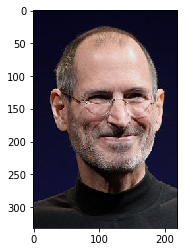

That's a human, but it looks like a dog2


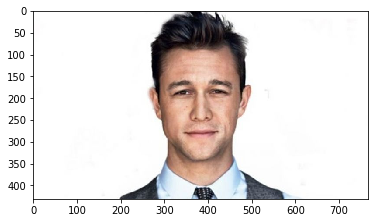

That's a human, but it looks like a jobbs


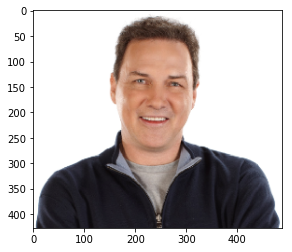

That's a human, but it looks like a joseph-gordon-levitt-2


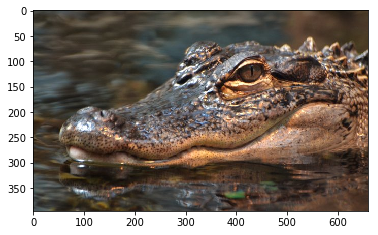

I can't detect anything!


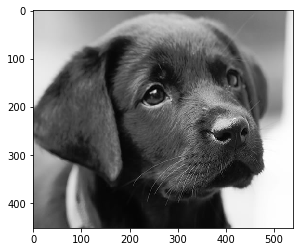

That's a dog. Breed: alligator


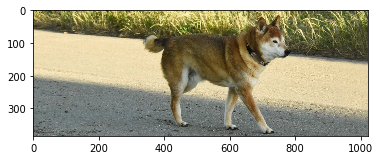

I can't detect anything!


In [135]:
k = 0
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file, my_class_idx, my_model, len(class_names_), class_names_, k)
    k += 1